Задание: Построить классификатор изображений рукописного ввода на базе MNIST.

In [ ]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [ ]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

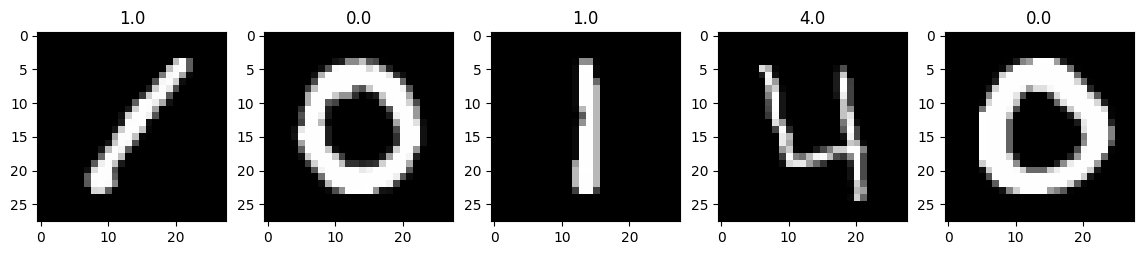

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

Подготовка данных для PCA

In [ ]:
X_train = train_img.reshape(train_img.shape[0], -1)
X_test = test_img.reshape(test_img.shape[0], -1)

In [ ]:
scaler = StandardScaler() #нормализация данных
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Применяем PCA

In [ ]:
pca = PCA(n_components=100, random_state=42)

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Разделение данных на обучающую выборку и валидационную

In [ ]:
y_train, y_val, x_train, x_val = train_test_split(train_label, X_train_pca, test_size=0.2, random_state=42)

In [ ]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Оцениваем качество решения на валидационной выборке

In [ ]:
y_forestpred_val = forest_model.predict(x_val)
forest_accuracy_val = accuracy_score(y_val, y_forestpred_val)
print(f"Validation Accuracy: {forest_accuracy_val}")

Validation Accuracy: 0.9419047619047619


Визуализируем предсказания на тестовых данных

In [ ]:
y_forestpred_test = forest_model.predict(X_test_pca)

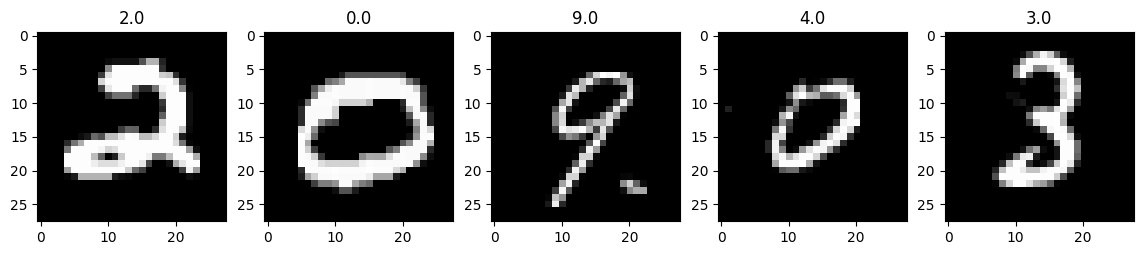

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y_forestpred_test[i - 1]);

Классификация при помощи логистической регрессии

In [ ]:
logreg_model = LogisticRegression(random_state=42, solver='liblinear')
logreg_model.fit(x_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_logpred_val = logreg_model.predict(x_val)
log_accuracy_val = accuracy_score(y_val, y_logpred_val)
print(f"Validation Accuracy: {log_accuracy_val}")

Validation Accuracy: 0.9067857142857143


In [ ]:
y_logpred_test = logreg_model.predict(X_test_pca)

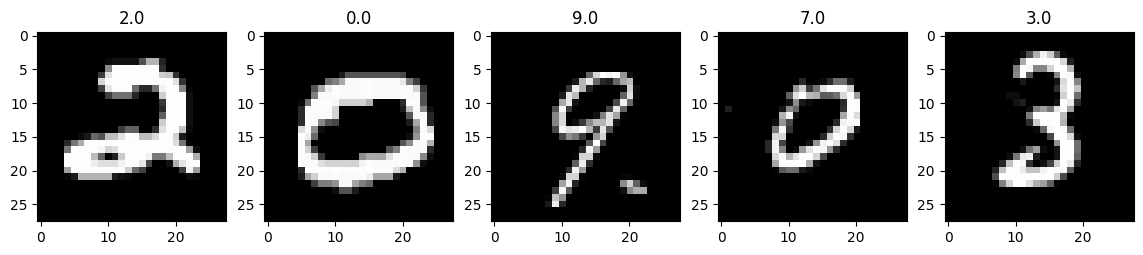

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y_logpred_test[i - 1]);

Классификация при помощи метода опорных векторов

In [ ]:
svm_model = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
svm_model.fit(x_train, y_train)

SVC(random_state=42)

In [ ]:
y_svmpred_val = svm_model.predict(x_val)
svm_accuracy_val = accuracy_score(y_val, y_svmpred_val)
print(f"Validation Accuracy: {svm_accuracy_val}")

Validation Accuracy: 0.9635714285714285


In [ ]:
y_svmpred_test = svm_model.predict(X_test_pca)

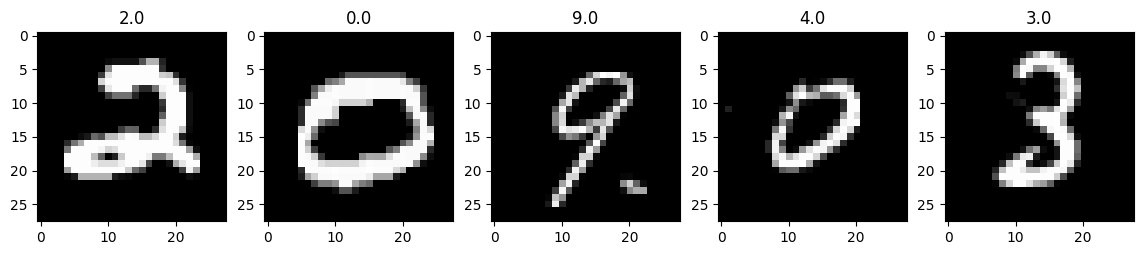

In [ ]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % y_svmpred_test[i - 1]);

In [ ]:
with open('forest_submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_forestpred_test, 1):
        dst.write('%s,%i\n' % (i, p))

In [ ]:
with open('logeg_submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_logpred_test, 1):
        dst.write('%s,%i\n' % (i, p))

In [ ]:
with open('svm_submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(y_svmpred_test, 1):
        dst.write('%s,%i\n' % (i, p))

В работе для построения классификатора изображений использовались 3 модели классификации (Random Forest, логистической регрессии и метода опорных векторов) для определения наилучших показателей. Оценка метрик моделей на Kaggle показала, что точнее классификация изображений происходит при работе с моделью SVM (Score = 0,96517), хотя и две другие модели показали хороший результат > 0.6.